In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

## 1. Linear Regression

### 1.1 Generate sample data

In [2]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x /= np.max(data_x)

In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x))

In [4]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

In [5]:
def train(x, gt_y, batch_portion, lr, max_iter):
    
    theta = np.random.randn(2)
    
    for i in range(max_iter):
    
        order = np.random.permutation(len(data_x))
        train_x = x[order[:batch_portion]]
        train_y = gt_y[order[:batch_portion]]
        gradient, error = get_gradient(theta, train_x, train_y)
        new_theta = theta - lr * gradient

        # Print error every 100 iterations
        if i % 100 == 0:
            print("Iteration: %d - Error: %.4f" %(i, error))

        theta = new_theta
        
    print("Theta is ",theta)
    print("Loss is ", error)
        
    return theta

In [6]:
theta = train(data_x, data_y, 80, 0.5, 400)

Iteration: 0 - Error: 29.0818
Iteration: 100 - Error: 1.7223
Iteration: 200 - Error: 1.7780
Iteration: 300 - Error: 1.6233
Theta is  [-2.032955   10.84419468]
Loss is  1.6540760123529195


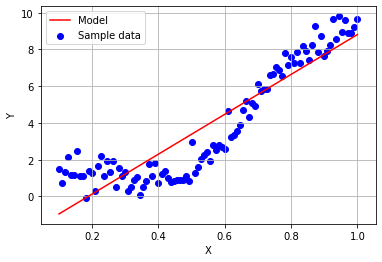

In [7]:
plt.scatter(data_x[:,1], data_y, c='b', label='Sample data')
plt.plot(data_x[:,1], data_x.dot(theta), c='r', label='Model')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## 2. Logistic Regression

In [9]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [11]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [12]:
iris_x = iris.data[:, :2]
iris_y = (iris.target != 0) * 1

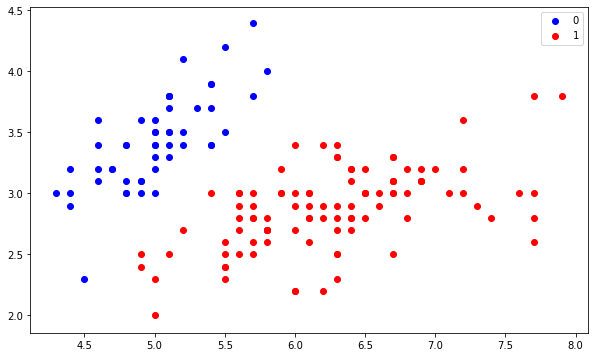

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_x[iris_y == 0][:, 0], iris_x[iris_y == 0][:, 1], color='b', label='0')
plt.scatter(iris_x[iris_y == 1][:, 0], iris_x[iris_y == 1][:, 1], color='r', label='1')
plt.legend()

In [21]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} , theta: {self.theta},index: {h[:5]}\t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [22]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)
model.fit(X, y)

loss: 0.6106904453410645 , theta: [0.01666667 0.1253     0.0386    ],index: [0.68800236 0.67840177 0.67460701 0.67099896 0.68613828]	
loss: 0.03432718644226483 , theta: [-2.99738435  5.85587137 -9.21022941],index: [0.00464068 0.12627508 0.00705091 0.00983341 0.00103238]	
loss: 0.02878665213455816 , theta: [ -4.77212978   6.82750621 -10.35339731],index: [0.00204821 0.0849014  0.0029774  0.00423076 0.00036808]	
loss: 0.025718548517683616 , theta: [ -6.34379979   7.39927242 -10.85734899],index: [0.0013474  0.06541128 0.0018134  0.00256065 0.00021733]	
loss: 0.02340842758463659 , theta: [ -7.78270414   7.80929507 -11.11678549],index: [0.00104359 0.05378299 0.00128883 0.00179316 0.00015739]	
loss: 0.021507024522720526 , theta: [ -9.11350662   8.13684725 -11.26326411],index: [0.00087798 0.04596819 0.00099401 0.00135835 0.00012626]	
loss: 0.019892368181604822 , theta: [-10.34893751   8.41769603 -11.35602244],index: [0.00077276 0.04029903 0.00080406 0.00107839 0.00010705]	
loss: 0.018503166440

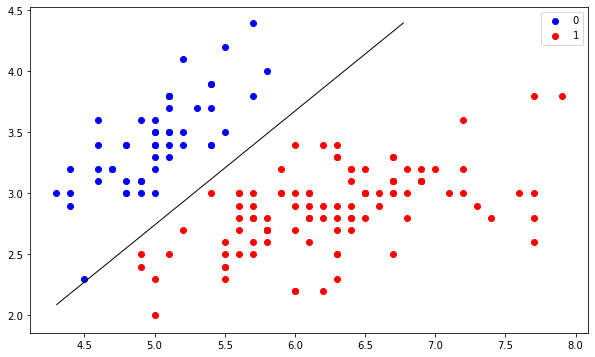

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');